# Objective :
Given historical air passenger data, the objective of this study is to develop accurate forecasting models utilizing ARIMA (AutoRegressive Integrated Moving Average) and SARIMAX (Seasonal AutoRegressive Integrated Moving Average with Exogenous Variables) methodologies. The aim is to predict future passenger counts, thereby aiding in resource allocation, capacity planning, and operational decision-making within the aviation industry. By leveraging advanced time series analysis techniques, this research seeks to provide reliable insights into the anticipated trends and fluctuations in air travel demand."

In [ ]:
# importing the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# loading the dataset


In [4]:
data = pd.read_csv('AirPassengers.csv')

In [5]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
data.shape

(144, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [8]:
# There are 144 rows and 2 columns in a data set and month contains obeject datatype and passengers contains integers

In [9]:
# converting month to date time format

In [10]:
data['Month'] = pd.to_datetime(data['Month'])

In [11]:
# making month as an index 

In [12]:
data = data.set_index('Month')

In [13]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [14]:
# check the pattern and distribution of data 

Text(0, 0.5, 'Passengers')

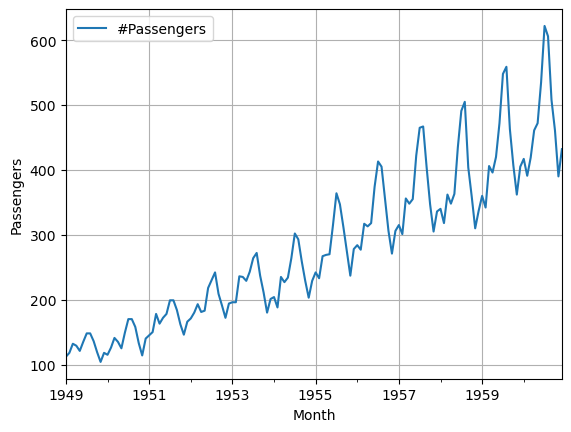

In [15]:
data.plot(grid = True)
plt.ylabel('Passengers')


In [16]:
# understanding more about data Trend and seasonality through seasonal decompose

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

Figure(640x480)


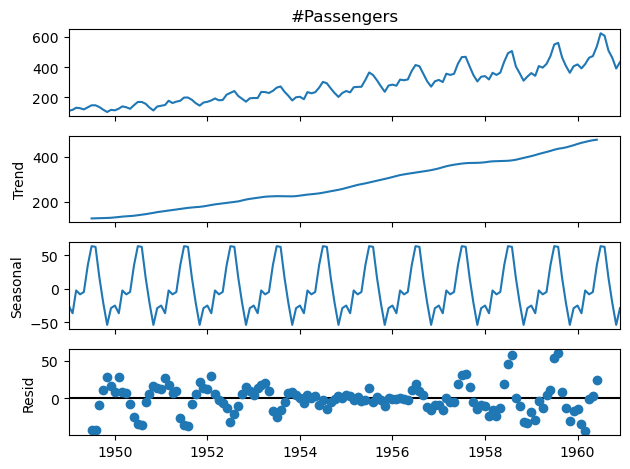

In [18]:
decomposition = seasonal_decompose(data['#Passengers'])
print(decomposition.plot())

In [19]:
# Dicky fuller test (adfuller) to check the data is stationary or non stationary

# h0 - Data is non_stationary
# h1 - Data is stationary

# If p_value is more then 0.05 do not reject the null hypothesis other wise reject it

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
result = adfuller(data)

In [22]:
p_value = result[1]

In [23]:
p_value

0.9918802434376411

In [24]:
# p_values is 0.99 it means data is non-stationary

### Making Data Stationary

In [25]:
# applying rolling mean and standard deviation

In [26]:
mean = data.rolling(window = 12).mean()

In [27]:
std = data.rolling(window = 12).std()

In [28]:
mean

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,463.333333
1960-09-01,467.083333
1960-10-01,471.583333


In [29]:
# plotting

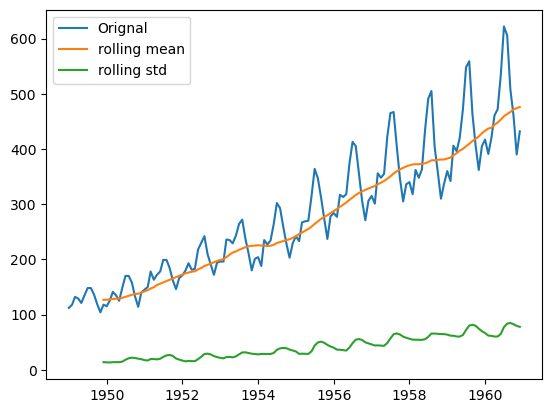

In [30]:
plt.plot(data, label = 'Orignal')
plt.plot(mean ,label = 'rolling mean')
plt.plot(std , label = 'rolling std')
plt.legend()

#### Log transfromation

In [31]:
data_log = np.log(data)

In [32]:
# to get back into orignal value
 
# data_nolog = np.exp(data_log)

In [33]:
data_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [34]:
# applying rolling mean and std in log data

In [35]:
log_mean = data_log.rolling(window = 12).mean()
log_std = data_log.rolling(window =12).std()

In [36]:
# plotting

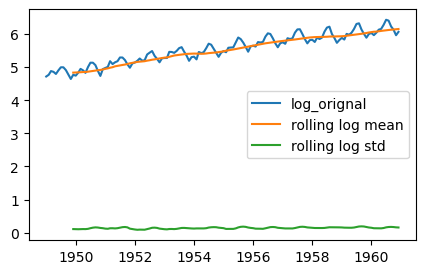

In [37]:
plt.figure(figsize =(5,3))
plt.plot(data_log, label = 'log_orignal')
plt.plot(log_mean , label = 'rolling log mean')
plt.plot(log_std , label = 'rolling log std')
plt.legend()

In [38]:
# lets do adfuller test again to check data is stationary or not 

In [39]:
result_2 = adfuller(data_log)

In [40]:
result_2[1]

0.4223667747703897

### p_value is greater that 0.05 hence again the data is non_stationary

In [41]:
# comparing orignal plot and log plot

Text(0.5, 1.0, 'Log Data')

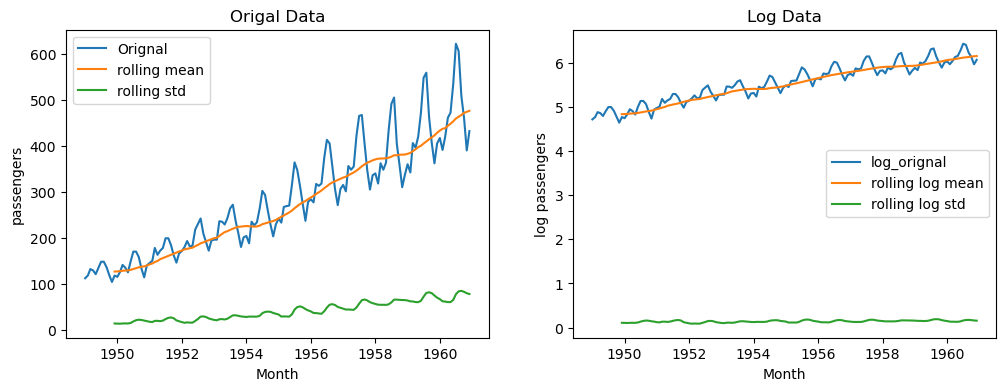

In [42]:
fig,(ax1 ,ax2) = plt.subplots(1,2,figsize = (12,4))

ax1.plot(data, label = 'Orignal')
ax1.plot(mean ,label = 'rolling mean')
ax1.plot(std , label = 'rolling std')
ax1.legend()
ax1.set_xlabel('Month')
ax1.set_ylabel('passengers')
ax1.set_title('Origal Data')

ax2.plot(data_log, label = 'log_orignal')
ax2.plot(log_mean , label = 'rolling log mean')
ax2.plot(log_std , label = 'rolling log std')
ax2.legend()
ax2.set_xlabel('Month')
ax2.set_ylabel('log passengers')
ax2.set_title('Log Data')

### performing differncing on a data_set

In [43]:
data_dif = data.diff()

In [44]:
data_dif.isna().sum()

#Passengers    1
dtype: int64

In [45]:
data_dif = data_dif.fillna(0)

In [46]:
data_dif

,#Passengers
Month,
1949-01-01,0.0
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [47]:
# calculating rolling mean and standard deviation

In [48]:
mean_diff = data_dif.rolling(window = 12).mean()
std_diff = data_dif.rolling(window =12).std()

In [49]:
# plotting

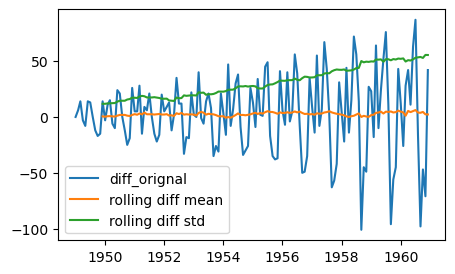

In [50]:
plt.figure(figsize =(5,3))
plt.plot(data_dif, label = 'diff_orignal')
plt.plot(mean_diff , label = 'rolling diff mean')
plt.plot(std_diff , label = 'rolling diff std')
plt.legend()

In [51]:
# we are on a right track 

In [52]:
# comparing plot with diff plot

Text(0.5, 1.0, 'diff Data')

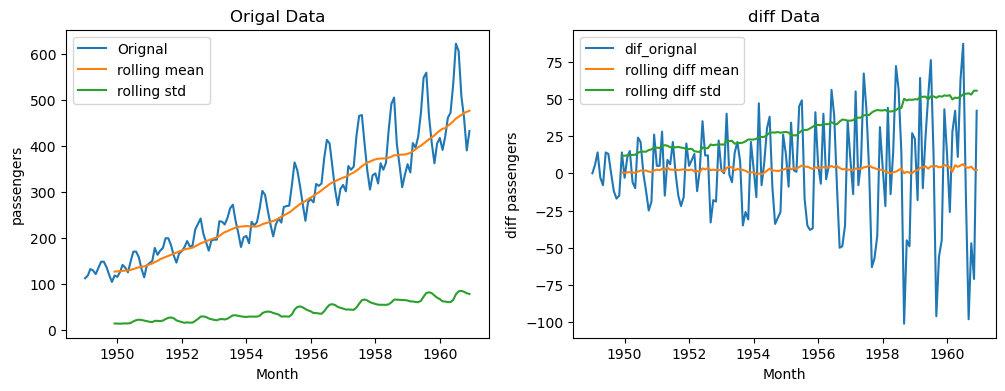

In [53]:
fig,(ax3 ,ax4) = plt.subplots(1,2,figsize = (12,4))

ax3.plot(data, label = 'Orignal')
ax3.plot(mean ,label = 'rolling mean')
ax3.plot(std , label = 'rolling std')
ax3.legend()
ax3.set_xlabel('Month')
ax3.set_ylabel('passengers')
ax3.set_title('Origal Data')

ax4.plot(data_dif, label = 'dif_orignal')
ax4.plot(mean_diff , label = 'rolling diff mean')
ax4.plot(std_diff , label = 'rolling diff std')
ax4.legend()
ax4.set_xlabel('Month')
ax4.set_ylabel('diff passengers')
ax4.set_title('diff Data')

In [54]:
# Again adfuller test

In [55]:
results_3 = adfuller(data_dif)

In [56]:
p_value_3 = results_3[1]
p_value_3

0.04662003920675609

#### P_value is less that 0.05 it means reject the null hypothesis

# we have successfully make data stationary

In [57]:
#  code to convert back diffrening to its orignal value
data_d = data.diff().dropna()
data_d = data_d.cumsum()
initial_value = 112
recovered_data = data_d+initial_value

In [58]:
recovered_data

,#Passengers
Month,
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


# Model Building :

### ARIMA

Arima is a statistical model that uses past values to predict its future values , it has three components :
    auto regression (AR) , Diffrencing (I) , Moving average (MA)

To select the optimal value of p,d,q there are two method  
1 - ACF and PACF plots

2 - Tuning with itertools

In [59]:
# First method 

In [60]:
# acf

In [61]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

In [62]:
new_data = data_dif.copy()

Figure(640x480)


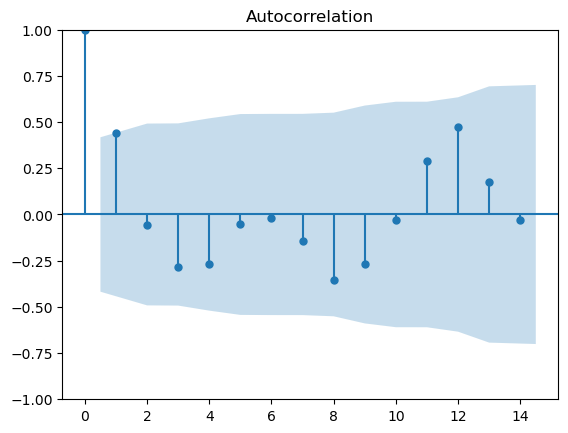

In [63]:
acf_plot = acf(new_data)
print(plot_acf(acf_plot))

In [64]:
# pacf

In [65]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

Figure(640x480)


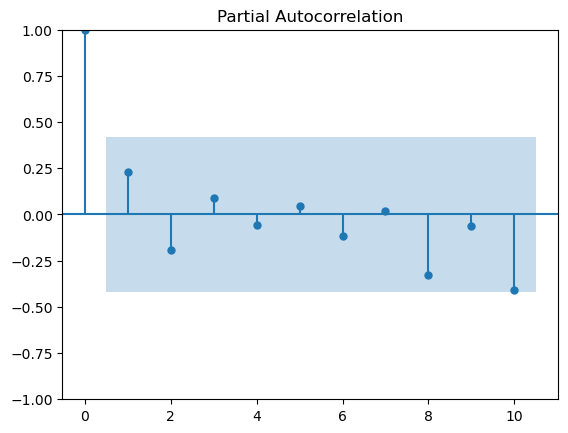

In [66]:
pacf_plot = pacf(new_data)
print(plot_pacf(pacf_plot ,lags =10 ))

In [67]:
# Dividing the data into train test

In [68]:
train = new_data.iloc[:120,:]['#Passengers']
test = new_data.iloc[120:,:]['#Passengers']

In [69]:
# importing the ARIMA 

In [70]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [71]:
model = ARIMA(train , order = (4,1,1)) 

model = model.fit()



In [72]:
new_data['Prediction'] = model.predict(start = len(train), end = len(train)+len(test)-1)

In [73]:
new_data

,#Passengers,Prediction
Month,,
1949-01-01,0.0,NaN
1949-02-01,6.0,NaN
1949-03-01,14.0,NaN
1949-04-01,-3.0,NaN
1949-05-01,-8.0,NaN
...,...,...
1960-08-01,-16.0,1.072959
1960-09-01,-98.0,1.585153
1960-10-01,-47.0,2.350200


In [74]:
# plot

<Axes: xlabel='Month'>

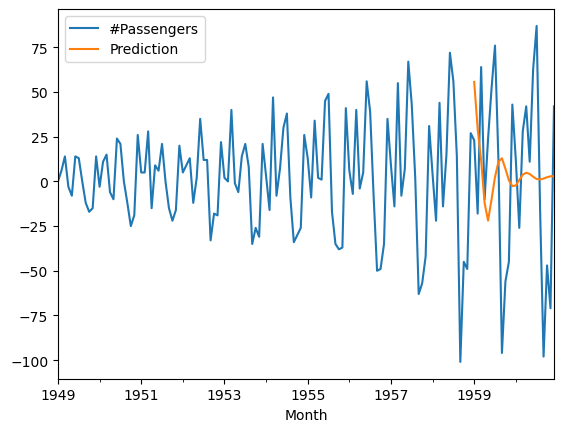

In [75]:
new_data[['#Passengers', 'Prediction']].plot()

In [76]:
# our model is not Doing well

In [77]:
# lets do second method 

In [78]:
import itertools

In [79]:
p = range(8)
d = range(0,2)
q = range(8)

pdq_combination = list(itertools.product(p,d,q))


In [80]:
pdq_combination

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 0, 7),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 0, 6),
 (2, 0, 7),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 0, 5),
 (3, 0, 6),
 (3, 0, 7),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (4, 0, 0),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4),
 (4, 0, 5),
 (4, 0, 6),
 (4, 0, 7),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (5, 0, 0),
 (5, 0, 1),
 (5, 0, 2),
 (5,

In [81]:
# lets check RMSE with each order through loop

In [82]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

In [83]:
RMSE = []
order1 = []

for i in pdq_combination:
    model = ARIMA(train,order = i)
    model = model.fit()
    pred = model.predict(start = len(train) , end = len(train)+ len(test)-1)
    error = np.sqrt(mean_squared_error(test,pred))
    order1.append(i)
    RMSE.append(error)
    
rmse_result = pd.DataFrame(index = order1 , data = RMSE , columns = ['RMSE score'])

In [84]:
rmse_result

,RMSE score
"(0, 0, 0)",51.672497
"(0, 0, 1)",51.497515
"(0, 0, 2)",51.444037
"(0, 0, 3)",52.185936
"(0, 0, 4)",51.070638
...,...
"(7, 1, 3)",53.692335
"(7, 1, 4)",54.197486
"(7, 1, 5)",54.290159
"(7, 1, 6)",47.318337


In [85]:
# check the least RMSE

In [86]:
rmse_result.sort_values(by = 'RMSE score' , ascending = True)

,RMSE score
"(7, 0, 7)",29.447636
"(6, 0, 6)",31.020610
"(7, 0, 5)",31.588188
"(7, 0, 6)",31.984412
"(7, 0, 4)",34.629903
...,...
"(3, 0, 5)",54.506667
"(3, 1, 6)",54.560496
"(3, 0, 4)",55.448333
"(2, 0, 7)",56.341046


#### we found the best combinantion  (7 , 0 , 7)

In [87]:
# now lets build a model taking 7,0,7 as pdq 

In [100]:
model = ARIMA(train , order = (7,1,7))
model = model.fit()

In [101]:
new_data['prediction2'] = model.predict(start = len(train) , end = len(train)+len(test)-1)


<Axes: xlabel='Month'>

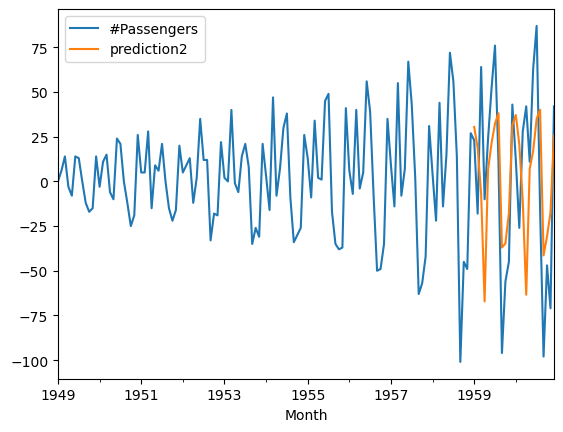

In [102]:
new_data[['#Passengers','prediction2']].plot()

### We got good prediction but not the Best

#### FORECAST

In [103]:
# WE are forcasting for next 5 years 

forecast = model.forecast(steps = 60 )

In [104]:
# forecast

<Axes: xlabel='Month'>

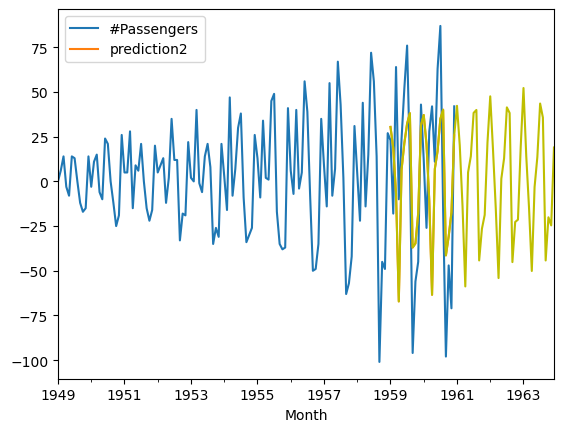

In [105]:
new_data[['#Passengers','prediction2']].plot()
forecast.plot(color = 'y')

In [106]:
# This data is seasonal data so lets make a SARIMA model

### SARIMA (seasonal Arima)

In [107]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [108]:
train_numeric = train.apply(pd.to_numeric, errors='coerce')


In [109]:
model2 = SARIMAX(train_numeric, order=(7, 1, 7), seasonal_order=(7, 1, 7, 12))
model2 = model2.fit()

<Axes: xlabel='Month'>

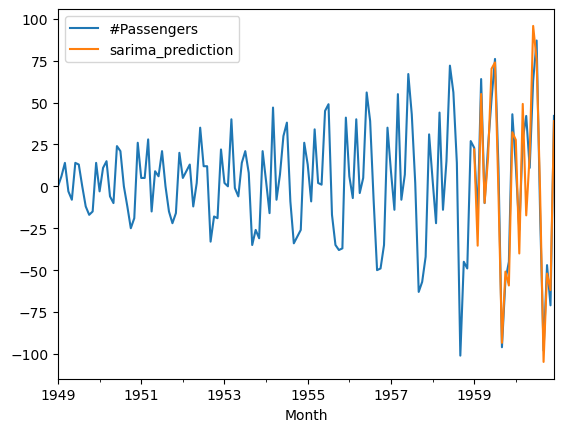

In [110]:
new_data['sarima_prediction'] = model2.predict(start = len(train),end = len(train)+len(test)-1)

new_data[['#Passengers','sarima_prediction']].plot()

<Axes: xlabel='Month'>

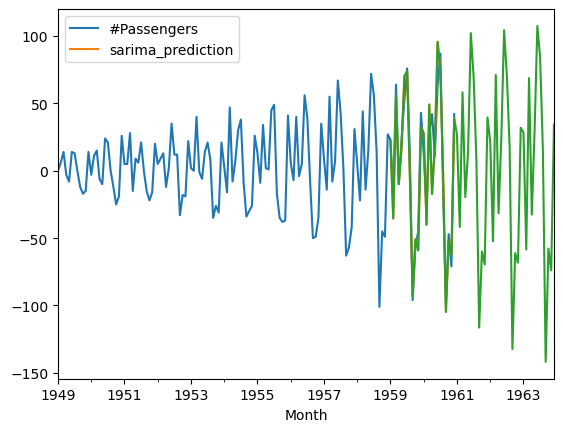

In [111]:
# Forecast for next Five year

forecast2 = model2.forecast(steps = 60)

new_data[['#Passengers','sarima_prediction']].plot()
forecast2.plot()

# WE GOT BEST MODEL